In [41]:
pwd

'c:\\Users\\USER\\Desktop\\ML\\linreg'

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.__version__

'0.12.2'

In [43]:
df = pd.read_csv("./House_Price.csv", header=0)

In [44]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [45]:
df.shape 

(506, 19)

# univariate analysis

In [46]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


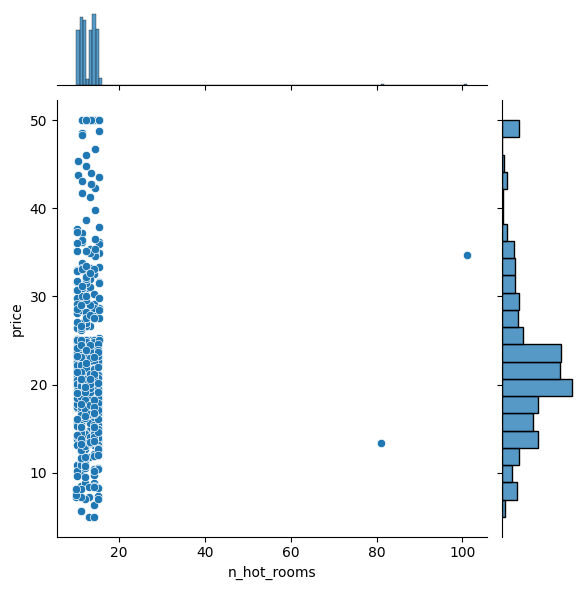

In [47]:
sns.jointplot(x="n_hot_rooms", y="price", data=df)

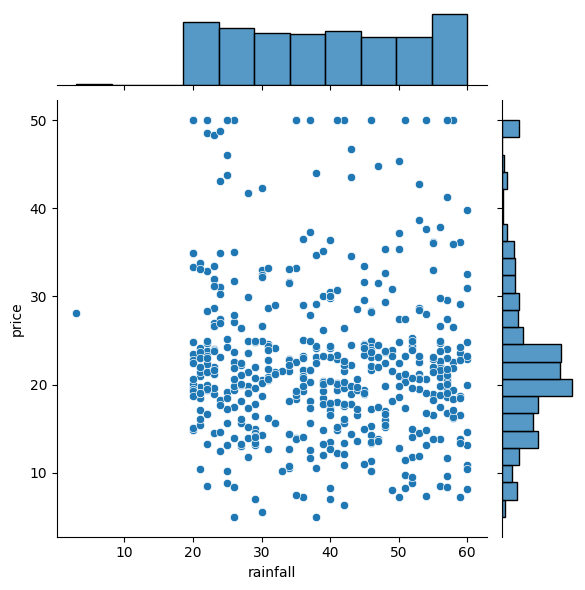

In [48]:
sns.jointplot(x="rainfall", y="price", data=df)

In [49]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


<Axes: xlabel='airport', ylabel='count'>

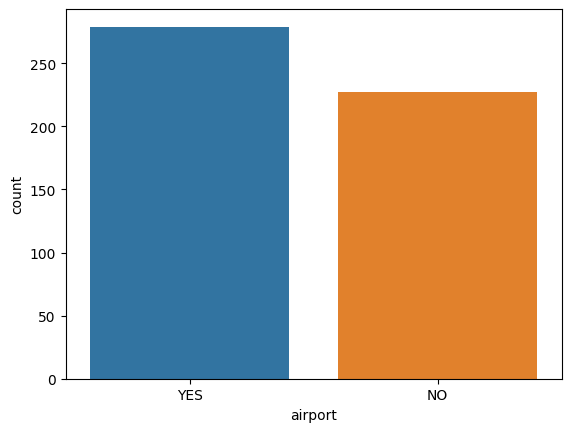

In [50]:
sns.countplot(x="airport", data=df)

<Axes: xlabel='waterbody', ylabel='count'>

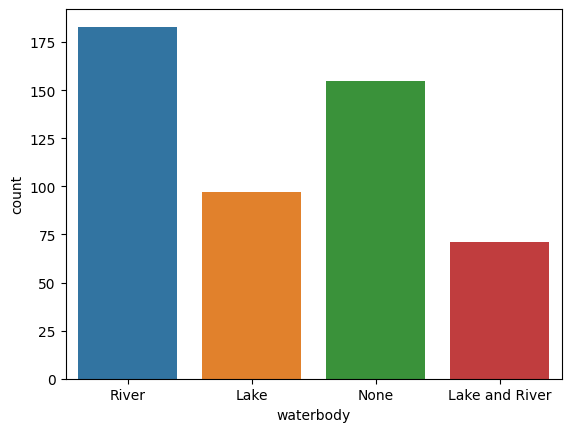

In [51]:
sns.countplot(x="waterbody", data=df)

<Axes: xlabel='bus_ter', ylabel='count'>

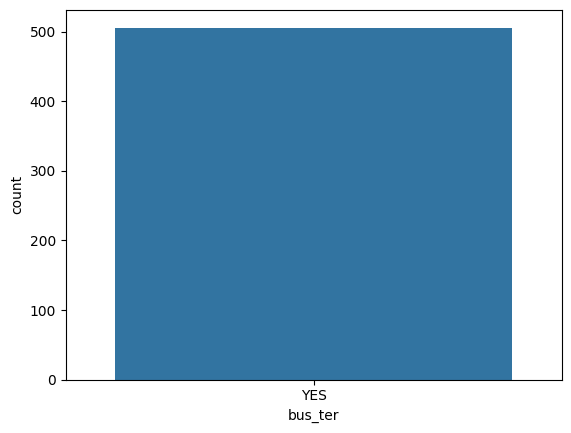

In [52]:
sns.countplot(x="bus_ter", data=df)

# outlier treatment

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [54]:
np.percentile(df.n_hot_rooms, [99])

array([15.39952])

#### upper limit

In [55]:
uv = np.percentile(df.n_hot_rooms, [99])[0]

In [56]:
df[(df.n_hot_rooms > uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [57]:
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv

C:\Users\USER\AppData\Local\Temp\ipykernel_19532\4019091346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms > 3*uv)] = 3*uv


In [58]:
np.percentile(df.rainfall, [1])[0]

20.0

In [59]:
lv = np.percentile(df.rainfall, [1])[0]

In [60]:
df[(df.rainfall > lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,16.8,0.22438,39.69,0.585,6.027,79.7,2.64,2.47,2.82,2.06,20.8,14.33,NO,6.236,14.13440,Lake,54,YES,0.052497
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.17920,Lake and River,27,YES,0.056006
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.19120,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.17600,None,47,YES,0.060694


In [61]:
df.n_hot_rooms[(df.rainfall < .3*lv)] = .3*lv

C:\Users\USER\AppData\Local\Temp\ipykernel_19532\1565339230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.rainfall < .3*lv)] = .3*lv


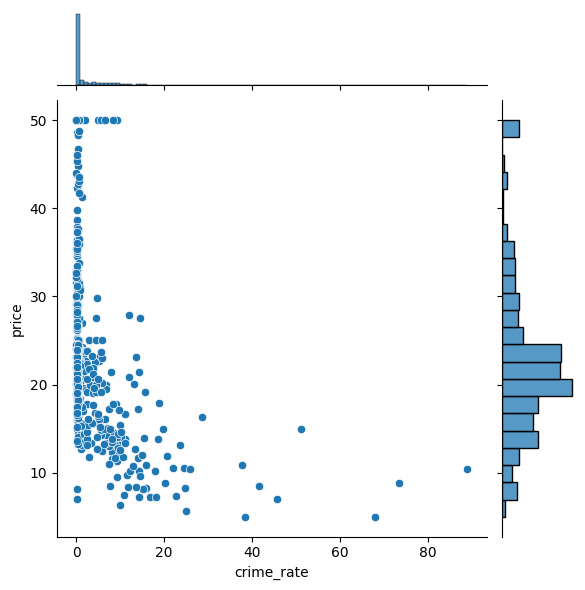

In [62]:
sns.jointplot(x="crime_rate", y="price", data=df)

transform the function then see outliers

In [63]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.855700,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.703509,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,6.000000,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


# Missing values

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [65]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

if you want to do for all columns.


df.n_hos_beds = df.fillna(df.n_hos_beds.mean())

# Variable transformation

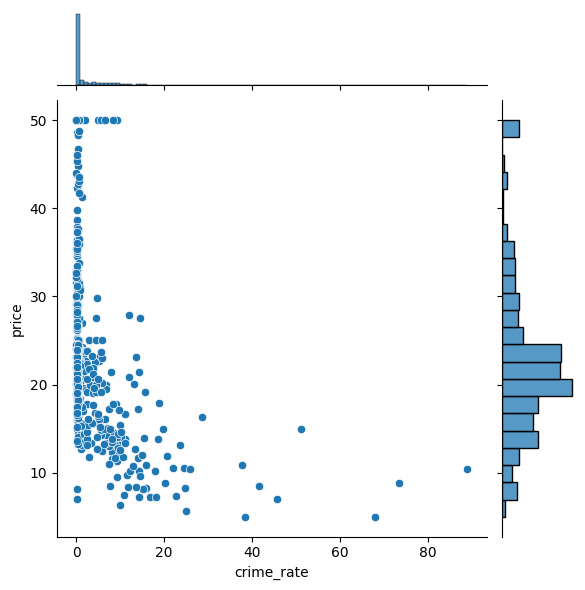

In [67]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [68]:
df.crime_rate = np.log(1 + df.crime_rate)

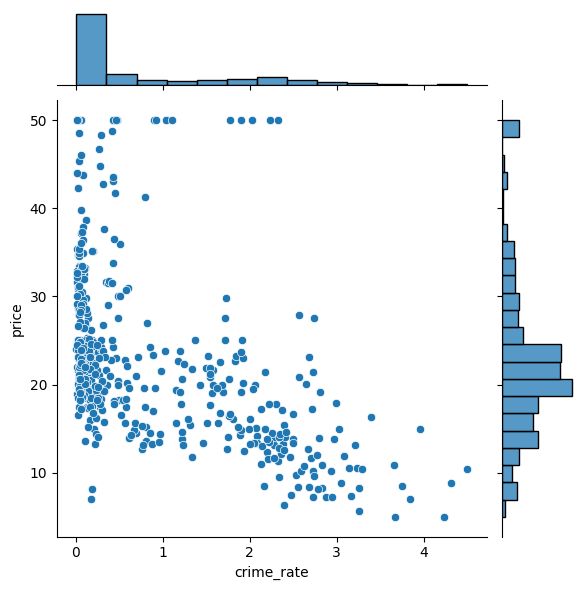

In [69]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [70]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [71]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.855700,39.181818,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.703509,12.513697,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,6.000000,3.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [72]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']
del df['bus_ter']

In [73]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.855700,39.181818,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.703509,12.513697,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,6.000000,3.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


# Dummy variables

In [74]:
df = pd.get_dummies(df)

In [75]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


In [76]:
df.drop(['airport_NO', 'waterbody_None'], axis=1, inplace=True)

In [77]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


# Correlation

In [78]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.015037,-0.047426,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.058325,0.082360,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003494,0.055810,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.008953,0.092104,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014105,-0.064694,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.017830,0.075198,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.036599,-0.045836,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.018361,0.061581,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.002399,0.058628,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.015037,0.058325,-0.003494,0.008953,0.014105,0.017830,-0.036599,0.018361,-0.002399,1.000000,0.024180,0.026664,-0.020807,-0.057825,0.039223,0.015924,-0.061420


parks and air quality high corr, delete the one with less corr with dependent variable that is the price.

In [79]:
del df['parks']

# linear regression

### using stats model

In [80]:
import statsmodels.api as sn

by default offset not added in stats  model

In [82]:
X = sn.add_constant(df['room_num'])

In [84]:
lm = sn.OLS(df['price'], X).fit()

In [85]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.31e-74
Time:                        23:32:25   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### using SK learn

In [89]:
from sklearn.linear_model import LinearRegression

In [86]:
y = df['price']

In [87]:
X = df[['room_num']]

In [90]:
lm2 = LinearRegression()

In [91]:
lm2.fit(X, y)

LinearRegression()

In [92]:
print(lm2.intercept_, lm2.coef_)

-34.659243123097184 [9.09966966]


In [93]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

In [94]:
lm2.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

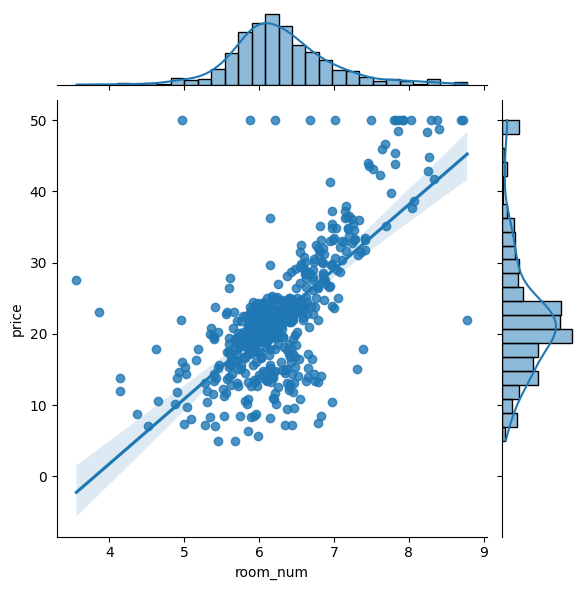

In [95]:
sns.jointplot(x=df['room_num'], y=df['price'], data=df, kind='reg')

# Multiple lin reg

In [97]:
x_multi = df[['room_num', 'age', 'crime_rate', 'waterbody_Lake', 'waterbody_River', 'waterbody_Lake and River', 'airport_YES', 'n_hos_beds', 'n_hot_rooms', 'rainfall', 'avg_dist']]

In [98]:
y_multi = df['price']

In [99]:
X_multi_const = sn.add_constant(x_multi)

In [100]:
lm_multi = sn.OLS(y_multi, X_multi_const).fit()

In [101]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     67.83
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           2.23e-91
Time:                        01:01:12   Log-Likelihood:                -1606.6
No. Observations:                 506   AIC:                             3237.
Df Residuals:                     494   BIC:                             3288.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -21.5057      3.680     -5.843      0.000     -28.737     -14.275
room_num                     7.7290      0.395     19.578      0.000       6.953       8.505
age                         -0.0780      0.015     -5.361      0.000      -0.107      -0.049
crime_rate                  -2.5394      0.333     -7.622      0.000      -3.194      -1.885
waterbody_Lake               0.8116      0.761      1.067      0.287      -0.683       2.306
waterbody_River              0.4210      0.646      0.652      0.515      -0.848       1.690
waterbody_Lake and River    -0.9897      0.849     -1.166      0.244      -2.657       0.678
airport_YES                  0.9578      0.539      1.777      0.076      -0.101       2.017
n_hos_beds                   0.4954      0.180      2.758      0.006       0.143       0.848
n_hot_rooms                  0.0887      0.097      0.914      0.361      -0.102       0.279
rainfall                     0.0183      0.021      0.865      0.387      -0.023       0.060
avg_dist                    -0.9462      0.197     -4.796      0.000      -1.334      -0.559
==============================================================================
Omnibus:                      251.048   Durbin-Watson:                   0.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2131.020
Skew:                           1.986   Prob(JB):                         0.00
Kurtosis:                      12.236   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### using SK Learn

In [105]:
# from sklearn.linear_model import LinearRegression

In [102]:
lm2_multi = LinearRegression()

In [103]:
lm2_multi.fit(x_multi, y_multi)

LinearRegression()

In [104]:
print(lm2_multi.intercept_, lm2_multi.coef_)

-21.505735261683537 [ 7.72900443 -0.07802574 -2.53943398  0.81159933  0.42097274 -0.98966183
  0.95780857  0.49543025  0.08870147  0.01828981 -0.94621029]


## Test Train Split

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=0)

In [109]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 11) (102, 11) (404,) (102,)


In [110]:
lm_a = LinearRegression()

In [111]:
lm_a.fit(x_train, y_train)

LinearRegression()

In [112]:
y_test_a = lm_a.predict(x_test)

In [113]:
y_train_a = lm_a.predict(x_train)

In [114]:
from sklearn.metrics import r2_score

In [115]:
r2_score(y_test, y_test_a)

0.40122497024423764

In [118]:
r2_score(y_train, y_train_a)

0.6417078868883268

In [116]:
from sklearn.metrics import mean_squared_error

In [117]:
mean_squared_error(y_test, y_test_a)

48.19010790100177

## Ridge and Lasso 

## First STANDARDISE

In [119]:
from sklearn import preprocessing

In [120]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [121]:
x_train_s = scaler.transform(x_train)

In [123]:
x_test_s = scaler.transform(x_test)

In [124]:
from sklearn.linear_model import Ridge

In [125]:
lm_r = Ridge(alpha=0.5)

In [126]:
lm_r.fit(x_train_s, y_train)

Ridge(alpha=0.5)

In [127]:
r2_score(y_test, lm_r.predict(x_test_s))

0.4015603264824945

#### test for multiple alpha

In [128]:
from sklearn.model_selection import validation_curve


100 values between 10pow-2 and 10pow8

In [129]:
param_range = np.logspace(-2, 8, 100)

In [132]:
validation_curve?

Signature:
validation_curve(
    estimator,
    X,
    y,
    *,
    param_name,
    param_range,
    groups=None,
    cv=None,
    scoring=None,
    n_jobs=None,
    pre_dispatch='all',
    verbose=0,
    error_score=nan,
    fit_params=None,
)
Docstring:
Validation curve.

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified
parameter. This is similar to grid search with one parameter. However, this
will also compute training scores and is merely a utility for plotting the
results.

Read more in the :ref:`User Guide <validation_curve>`.

Parameters
----------
estimator : object type that implements the "fit" and "predict" methods
    An object of that type which is cloned for each validation.

X : array-like of shape (n_samples, n_features)
    Training vector, where `n_samples` is the number of samples and
    `n_features` is the number of features.

y : array-like of shape (n_samples,) or (n_samples, 

In [133]:
train_scores, test_scores = validation_curve(Ridge(), x_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')

### The validation_curve function from scikit-learn returns a 2D array because it calculates the validation scores for different values of a specified hyperparameter, across multiple iterations of cross-validation

In [135]:
print(train_scores, test_scores)

[[6.26946742e-01 6.47849978e-01 6.48983407e-01 6.73596847e-01
  6.26350596e-01]
 [6.26946742e-01 6.47849977e-01 6.48983406e-01 6.73596847e-01
  6.26350595e-01]
 [6.26946741e-01 6.47849976e-01 6.48983406e-01 6.73596846e-01
  6.26350595e-01]
 [6.26946740e-01 6.47849975e-01 6.48983404e-01 6.73596845e-01
  6.26350593e-01]
 [6.26946738e-01 6.47849973e-01 6.48983402e-01 6.73596842e-01
  6.26350592e-01]
 [6.26946734e-01 6.47849970e-01 6.48983398e-01 6.73596839e-01
  6.26350589e-01]
 [6.26946729e-01 6.47849966e-01 6.48983392e-01 6.73596834e-01
  6.26350584e-01]
 [6.26946721e-01 6.47849958e-01 6.48983382e-01 6.73596826e-01
  6.26350577e-01]
 [6.26946708e-01 6.47849946e-01 6.48983367e-01 6.73596813e-01
  6.26350565e-01]
 [6.26946687e-01 6.47849927e-01 6.48983343e-01 6.73596792e-01
  6.26350546e-01]
 [6.26946654e-01 6.47849897e-01 6.48983305e-01 6.73596760e-01
  6.26350516e-01]
 [6.26946601e-01 6.47849849e-01 6.48983244e-01 6.73596707e-01
  6.26350468e-01]
 [6.26946517e-01 6.47849773e-01 6.489831

In [139]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

In [137]:
print(train_mean)

[6.44745514e-01 6.44745513e-01 6.44745513e-01 6.44745511e-01
 6.44745509e-01 6.44745506e-01 6.44745501e-01 6.44745493e-01
 6.44745480e-01 6.44745459e-01 6.44745426e-01 6.44745374e-01
 6.44745291e-01 6.44745158e-01 6.44744947e-01 6.44744612e-01
 6.44744080e-01 6.44743234e-01 6.44741891e-01 6.44739760e-01
 6.44736383e-01 6.44731037e-01 6.44722587e-01 6.44709254e-01
 6.44688265e-01 6.44655320e-01 6.44603786e-01 6.44523519e-01
 6.44399147e-01 6.44207639e-01 6.43914946e-01 6.43471518e-01
 6.42806538e-01 6.41820850e-01 6.40378764e-01 6.38299217e-01
 6.35347203e-01 6.31226960e-01 6.25579128e-01 6.17984957e-01
 6.07981185e-01 5.95088693e-01 5.78855850e-01 5.58913578e-01
 5.35034946e-01 5.07189577e-01 4.75583488e-01 4.40677186e-01
 4.03177084e-01 3.63996716e-01 3.24187093e-01 2.84841871e-01
 2.46991764e-01 2.11508763e-01 1.79039402e-01 1.49977523e-01
 1.24475258e-01 1.02481838e-01 8.37963116e-02 6.81216952e-02
 5.51122207e-02 4.44097725e-02 3.56690012e-02 2.85725763e-02
 2.28388305e-02 1.822407

In [140]:
max(test_mean)

0.6151122615986276

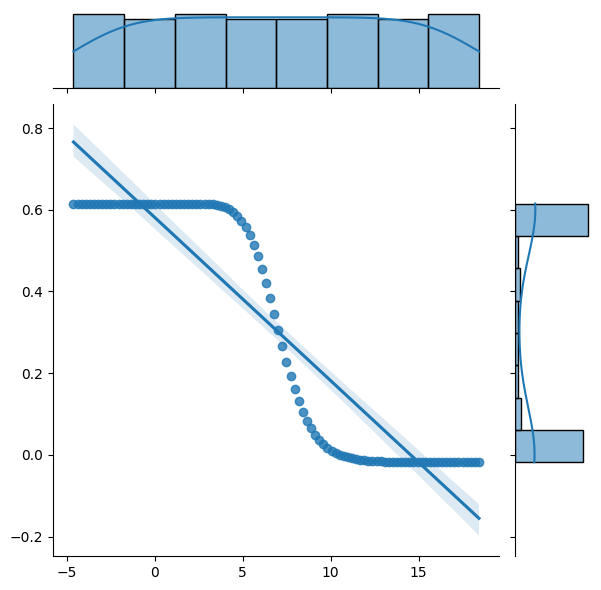

In [142]:
sns.jointplot(x=np.log(param_range) ,y=test_mean, kind='reg')

In [143]:
np.where(test_mean == max(test_mean))

(array([30], dtype=int64),)

In [144]:
param_range[30]

10.722672220103231

In [145]:
lm_r_best = Ridge(alpha=param_range[30])

In [147]:
lm_r_best.fit(x_train_s, y_train)

Ridge(alpha=10.722672220103231)

In [148]:
r2_score(y_test, lm_r_best.predict(x_test_s))

0.4075971253454326

In [149]:
r2_score(y_train, lm_r_best.predict(x_train_s))

0.6411734819529888

## Lasso - almost same 

In [150]:
from sklearn.linear_model import Lasso

In [151]:
lm_l = Lasso(alpha=0.5)

In [152]:
lm_l.fit(x_train_s, y_train)

Lasso(alpha=0.5)

In [153]:
r2_score(y_test, lm_l.predict(x_test_s))

0.3966203594853469